<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [ ]:
#simplilearn project 1: Movie Analysis

In [ ]:
# part 1: Importing Data

In [1]:
# a.importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# b. creating dataset
movies = pd.read_csv("movies.dat", sep ='::', names = ["MovieID", "Title", "Genres"],
                    dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
user =  pd.read_csv("users.dat", sep ='::', names = ["UserID", "Gender", "Age", "Occupation", "Zip-code"],
                    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
rating =pd.read_csv("ratings.dat", sep = '::', names=  ["UserID", "MovieID", "Rating", "Timestamp"],
                    dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

In [5]:
# 2. Analysis

In [ ]:
# 2.1 Movie dataset Analysis

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(3883, 3)

In [5]:
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [7]:
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [14]:
# 2.2 User Data

In [8]:
user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
user.shape

(6040, 5)

In [10]:
user.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [11]:
user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [ ]:
# Gender diffrenciation

In [12]:
gender = user.groupby('Gender').size()
gender

Gender
F    1709
M    4331
dtype: int64

In [ ]:
# 2.3 Rating Data

In [13]:
rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
rating.shape

(1000209, 4)

In [15]:
rating.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [16]:
rating.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [17]:
# rating distribution
rating_dist = rating.groupby(['UserID']).size()
rating_dist.head()

UserID
1     53
2    129
3     51
4     21
5    198
dtype: int64

In [ ]:
# 3. Merging

In [18]:
user_rating = pd.merge(user,rating , how = 'inner', on = 'UserID')
user_rating.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [ ]:
# 4. Matser Data set (merge user , rating and movie)

In [19]:
master_data = pd.merge(movies,user_rating, how = 'inner', on = 'MovieID')
master_data.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474


In [20]:
master_data.shape

(1000209, 10)

In [21]:
master_data.describe()

,MovieID,UserID,Age,Occupation,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00


In [22]:
master_data.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
Rating        0
Timestamp     0
dtype: int64

In [ ]:
# 4. visualization

In [ ]:
# Age distribution

In [23]:
age_dist = master_data.groupby('Age').size()
age_dist

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

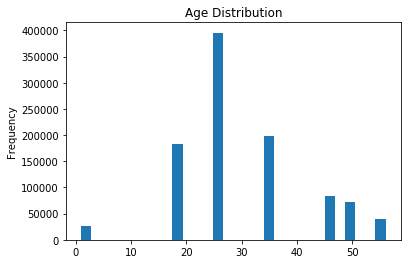

In [24]:
# graph age distribution
master_data.Age.plot.hist(bins=30)
plt.title('Age Distribution')
plt.show()

In [ ]:
# it is evident that majorty users are below 30

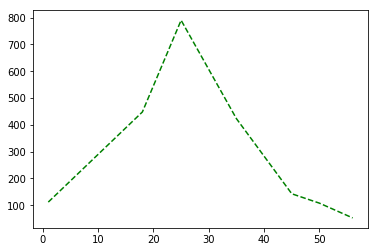

In [25]:
# Toy Story movie rating
toystory_rating = master_data[master_data.Title == "Toy Story (1995)"]
plt.plot(toystory_rating.groupby("Age")["MovieID"].count(),'--g')

In [ ]:
# people between 20 - 30 watched more toy story

In [ ]:
# top 25 movie by ratings

In [26]:
movie_rating = master_data.groupby(['MovieID'], as_index=False)
top25_movies = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
top25_movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

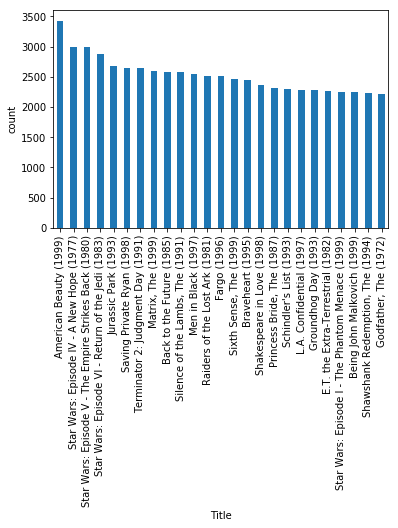

In [27]:
plt.ylabel("count")
plt.xlabel("Movie Names")
top25_movies.plot(kind="bar")

In [ ]:
# american beauty has the highest rating

In [ ]:
# finding rating of userid = 2696

In [28]:
user_rating_2696 = master_data[master_data['UserID']==2696]
user_rating_2696.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
95261,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,M,25,7,24210,3,973308886
200536,800,Lone Star (1996),Drama|Mystery,2696,M,25,7,24210,5,973308842
270342,1092,Basic Instinct (1992),Mystery|Thriller,2696,M,25,7,24210,4,973308886
274576,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,M,25,7,24210,3,973308690
349333,1258,"Shining, The (1980)",Horror,2696,M,25,7,24210,4,973308710


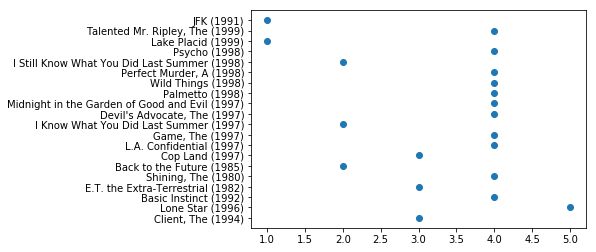

In [29]:
plt.scatter(y=user_rating_2696.Title, x=user_rating_2696.Rating)

In [ ]:
# preparing data for 500

In [30]:
viewer = master_data.head(500)

In [ ]:
# data preprocess

In [31]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(viewer['Age'])
x_age = le.transform(viewer['Age'])
x_age

array([0, 5, 2, 2, 3, 1, 0, 1, 3, 2, 2, 1, 2, 1, 4, 4, 2, 1, 0, 3, 5, 3,
       1, 1, 0, 3, 4, 6, 6, 1, 2, 0, 4, 2, 2, 2, 3, 0, 3, 3, 1, 2, 2, 1,
       2, 2, 3, 1, 5, 2, 3, 2, 1, 4, 3, 1, 1, 5, 2, 2, 2, 1, 1, 2, 1, 4,
       2, 4, 0, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 4, 2, 2, 2, 2, 1, 2, 1,
       3, 2, 2, 3, 1, 1, 1, 2, 6, 4, 2, 2, 1, 1, 1, 5, 2, 1, 6, 1, 5, 5,
       3, 3, 1, 3, 2, 3, 2, 4, 1, 1, 1, 5, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 4, 3, 2, 2, 2, 3, 2, 2, 1, 1, 4, 3, 1, 6, 6, 1, 3, 1, 2,
       3, 2, 5, 2, 2, 0, 1, 1, 1, 2, 2, 6, 3, 5, 1, 1, 3, 1, 2, 2, 2, 1,
       2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 4, 3, 2, 2, 1, 2, 3, 2, 1, 1, 0, 2,
       3, 3, 5, 1, 2, 2, 1, 3, 0, 3, 3, 0, 6, 3, 3, 3, 3, 6, 4, 4, 1, 3,
       2, 1, 2, 3, 2, 2, 3, 2, 2, 5, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 1, 1,
       0, 3, 2, 2, 3, 4, 3, 2, 1, 0, 3, 0, 1, 3, 2, 0, 3, 3, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 4, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 3, 3, 0, 1, 2, 3, 1, 3, 0,

In [32]:
le.fit(viewer['Occupation'])
occupation = le.transform(viewer['Occupation'])
occupation

array([10,  9, 12, 17,  1,  3, 10, 16,  0,  7,  1,  0,  3,  4, 17, 16,  4,
       12, 10, 20,  1, 12,  4,  4, 10,  7,  1,  1, 13,  4, 16, 10, 15, 16,
        2, 17, 17, 10,  7,  9,  4, 17,  0,  2, 20,  7, 20,  4, 17,  1,  7,
       20,  4,  7, 16,  4,  4,  0,  7,  0,  2, 17,  4,  0,  5,  1, 17, 15,
       10, 12, 12,  4,  7,  4, 20, 14, 12, 17,  4,  7,  1,  3, 20,  5,  6,
       19, 16,  4,  0,  7,  7,  0,  4,  0,  4, 12,  1,  9, 12,  7,  4,  4,
        0, 16,  2,  4,  9,  4,  3, 11,  7,  2, 19,  7,  3,  3,  0, 20,  4,
        4,  3, 15,  0,  1,  4,  1,  0,  2,  6,  0,  6,  7,  5, 11,  4,  1,
       15, 11,  0,  3,  1, 17, 12,  4,  0,  3, 17, 11,  0, 13,  4,  0, 16,
        7,  3, 17, 16, 12, 14, 10,  4, 10,  4,  1,  2, 14, 14,  7,  0, 17,
       12, 14, 12, 20,  2,  4,  5,  0,  6,  8,  4,  9,  4, 17, 19, 12, 15,
        0,  5,  0,  1, 11,  6,  7, 20,  4, 10,  4,  0, 20, 17,  0, 17,  1,
        4,  0, 10, 14, 17, 10, 17, 12,  0, 20,  7, 13, 16, 16,  4, 18, 17,
       16,  0,  7,  4, 12

In [33]:
le.fit(viewer['MovieID'])
movie_id = le.transform(viewer['MovieID'])
movie_id

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
viewer['New_Age'] = x_age
viewer['New_Occupation'] = occupation
viewer['New_Movie_ID'] = movie_id

C:\Users\16476\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\16476\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\16476\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [93]:
# Feature Selection

In [35]:
x_input = viewer[['New_Age','New_Occupation','New_Movie_ID']]
y_target = viewer['Rating']

In [36]:
x_input.head()

,New_Age,New_Occupation,New_Movie_ID
0,0,10,0
1,5,9,0
2,2,12,0
3,2,17,0
4,3,1,0


In [37]:
#4. Algorithms
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# data splitting

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [40]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

In [41]:
result = logitReg.predict(x_test)

In [42]:
estimated = pd.Series(result, name='Estimated Values')

In [43]:
final_result = pd.concat([y_test, estimated], axis=1)

In [44]:
# evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.36
[[ 0  0  4  2]
 [ 0  0  9 11]
 [ 0  0 28 22]
 [ 0  0 32 17]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        20
           4       0.38      0.56      0.46        50
           5       0.33      0.35      0.34        49

   micro avg       0.36      0.36      0.36       125
   macro avg       0.18      0.23      0.20       125
weighted avg       0.28      0.36      0.31       125



C:\Users\16476\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
#Accuracy is 36 %

In [45]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.391607 (0.068956)
LDA: 0.386344 (0.074333)
KNN: 0.324538 (0.103191)

C:\Users\16476\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\16476\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\16476\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\16476\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\16476\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\16476\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\16476\Anacond


CART: 0.314367 (0.041830)
NB: 0.340754 (0.114203)
SVM: 0.324609 (0.081315)


In [ ]:
 # comparing all algorithms

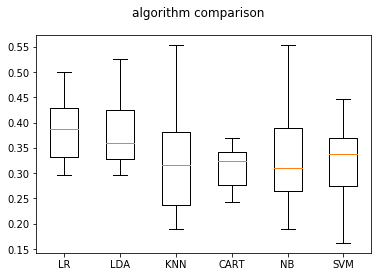

In [46]:
fig = plt.figure()
fig.suptitle('algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# as seen from the graph LR has more value